In [ ]:
!pip install tensorflow-io[tensorflow]

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = "/content/drive/MyDrive/Parkinsons/dataset 2"

In [ ]:
os.listdir(os.path.join(data_dir))

['affected', 'healthy']

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'affected', 'P_0.jpg' ))

In [ ]:
img.shape

(256, 256, 3)

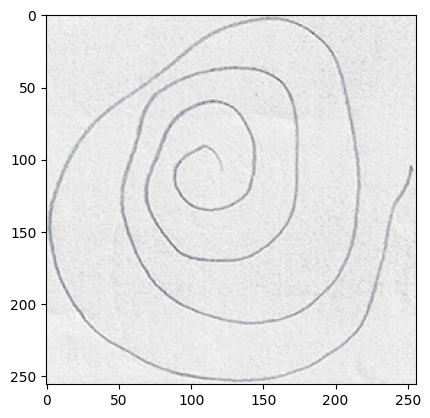

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
type(img)

numpy.ndarray

### **LOADING THE DATASET**

In [ ]:
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 102 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

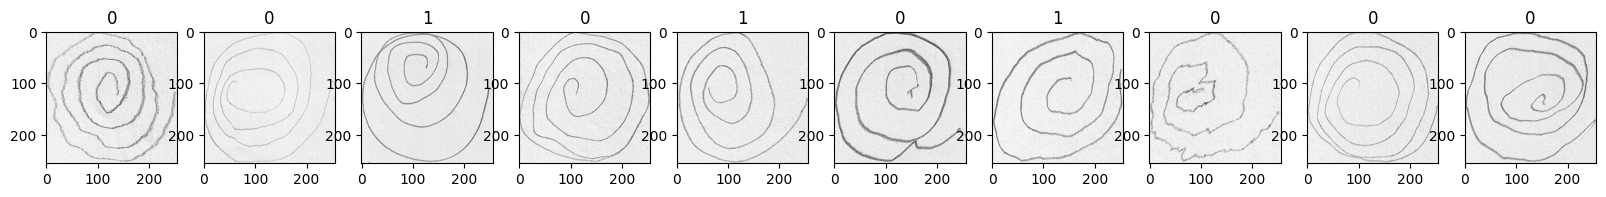

In [ ]:
#0 is affected
#1 is healthy
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### **SCLAING**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.9098039 , 0.9098039 , 0.9098039 ],
          [0.90588236, 0.90588236, 0.90588236],
          [0.94509804, 0.94509804, 0.94509804],
          ...,
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.88235295, 0.88235295, 0.88235295],
          [0.9372549 , 0.9372549 , 0.9372549 ]],
 
         [[0.95686275, 0.95686275, 0.95686275],
          [0.8862745 , 0.8862745 , 0.8862745 ],
          [0.9411765 , 0.9411765 , 0.9411765 ],
          ...,
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.8862745 , 0.8862745 , 0.8862745 ],
          [0.89411765, 0.89411765, 0.89411765]],
 
         [[0.972549  , 0.972549  , 0.972549  ],
          [0.9372549 , 0.9372549 , 0.9372549 ],
          [0.91764706, 0.91764706, 0.91764706],
          ...,
          [0.94509804, 0.94509804, 0.94509804],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8784314 , 0.8784314 , 0.8784314 ]],
 
         ...,
 
         [[0.95686275, 0.95686275, 0.95686275],
          [0.90588

### **SPLITTING**

In [ ]:
len(data)

4

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
print(train_size)
print(val_size)
print(test_size)

2
1
1


In [ ]:
train_size + val_size + test_size

4

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
len(test)

2
1


1

### **TRAIN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
logdir='/content/drive/MyDrive/Parkinsons/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=18, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/18
2/2 [==============================] - 5s 3s/step - loss: 0.2073 - accuracy: 0.9531 - val_loss: 0.2418 - val_accuracy: 0.8750
Epoch 2/18
2/2 [==============================] - 6s 3s/step - loss: 0.2259 - accuracy: 0.8906 - val_loss: 0.1126 - val_accuracy: 0.9688
Epoch 3/18
2/2 [==============================] - 6s 4s/step - loss: 0.1894 - accuracy: 0.9531 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 4/18
2/2 [==============================] - 5s 3s/step - loss: 0.1439 - accuracy: 0.9531 - val_loss: 0.1555 - val_accuracy: 0.9688
Epoch 5/18
2/2 [==============================] - 6s 4s/step - loss: 0.1395 - accuracy: 0.9688 - val_loss: 0.2040 - val_accuracy: 0.9375
Epoch 6/18
2/2 [==============================] - 5s 3s/step - loss: 0.0779 - accuracy: 0.9844 - val_loss: 0.1284 - val_accuracy: 0.9688
Epoch 7/18
2/2 [==============================] - 5s 3s/step - loss: 0.0735 - accuracy: 0.9844 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 8/18
2/2 [=========================

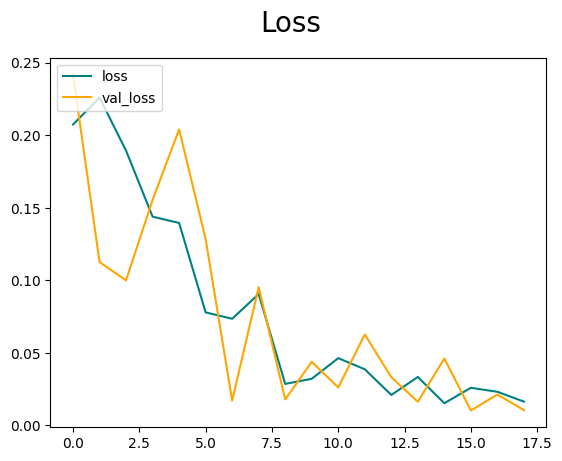

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

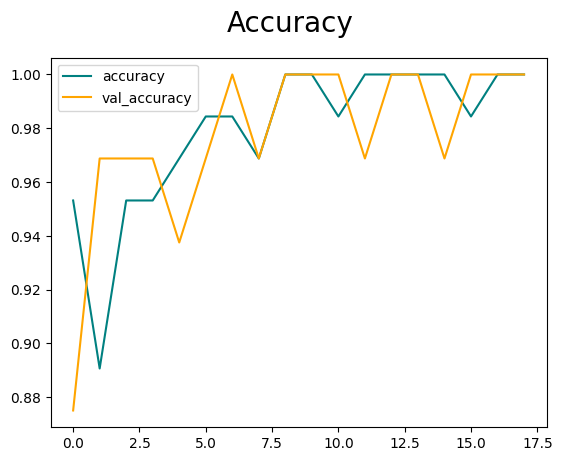

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
import cv2

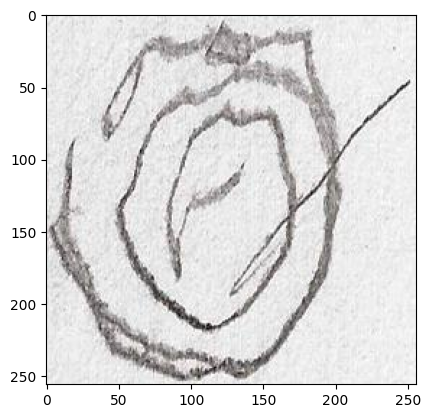

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Parkinsons/dataset 2/Parkinson236.png')
plt.imshow(img)
plt.show()

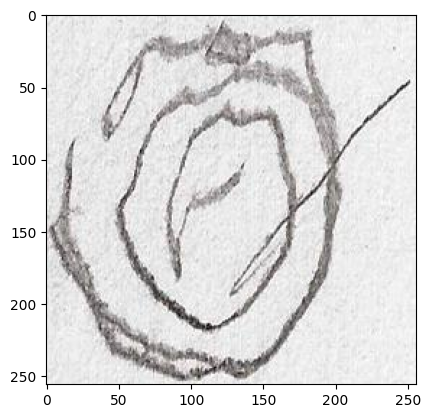

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


In [ ]:
yhat

array([[0.00450443]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is Parkinsons')

Predicted class is Parkinsons


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 91ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
